# Sersic Profiles

In [1]:
import numpy as np
import astropy.units as u
from scipy.optimize import curve_fit

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.centerofmass import CenterOfMass
from galaxy.massprofile import MassProfile
from galaxy.timecourse import TimeCourse

In [2]:
def get_sersic(galname, snap, R):
    mp = MassProfile(Galaxy(galname, snap, usesql=True))
    Re_bulge, bulge_total, BulgeI = mp.bulge_Re(R)
    n, err = mp.fit_sersic_n(R, Re_bulge, bulge_total, BulgeI)
    return Re_bulge, n, err

In [3]:
tc = TimeCourse()

In [4]:
# Array of radii 
R = np.arange(0.1, 30, 0.1) * u.kpc

In [ ]:
with open('./sersic.txt', 'w') as f:
    f.write(f"# {'gal':>5s}{'snap':>8s}{'t':>8s}{'Re':>8s}{'n':>8s}{'err':>8s}\n")
    
for galname in ('MW','M31'):
    print(galname)
    for snap in np.arange(0, 802):
        t = tc.snap2time(snap)
        try:
            Re, n, err = get_sersic(galname, snap, R)
            with open('./sersic.txt', 'a') as f:
                f.write(f"{galname:>7s}{snap:8d}{t:8.3f}{Re.value:8.2f}{n:8.2f}{err:8.4f}\n")   
        except ValueError:
            print(galname, snap)

MW
MW 0


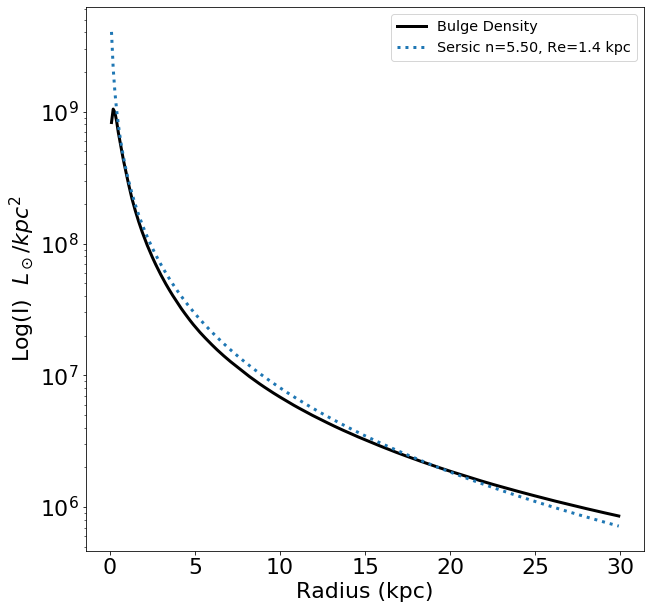

In [8]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# plot the bulge luminosity density as a proxy for surface brightness
plt.semilogy(R, BulgeI_MW_0, color='black',lw=3, label='Bulge Density')


# Sersic fit to the surface brightness Sersic fit
n_vals = [4, 4, 5.5]
# linestyles = ['-.', ':', '--']
plt.semilogy(R.value, sersic(R, Re_bulge_MW_0, n, bulge_total_MW_0), lw=3, ls=':',
                 label=f'Sersic n={n:.2f}, Re={Re_bulge_MW_0:.1f}')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large');